# Guide 2: Public Cloud Storage with Microsoft Azure

Public Cloud storage is the service that allow you to keep data on a remote server. You can use your documents but instead of querying them from folders saved in your hardware, they are secure in another place depending from the location you choose for your Azure Storage Account. The main reason for learning how to use storage are that a) it allows for an integrate use of the cloud computing softwares (SaaS) available from the provider and b) it allows to store up 195 GB in each container for an ideally ulimited number of containers (max size 4,7 Terabyte).

It is somehow expensive but convenient unless you want to scale your infrastructure every time you need to, incurring in costs that might be avoid in the feature. Let say you have 1 terabyte large folder containing the your last survey, and you want to save it somewhere. With a remote storage you will spend x (todo estimate x) for the next three years compared to buy a new external drive (current price). You can move files from local to remote server inside your Microsoft Azure storage account simply by using applications designed with friendly user interface or using Python.

In this tutorial we are going to explain: a) basic of the Microsoft Azure Storage Account service, b) how to use applications for uploading files (i.e. Storage Explorer), c) how to use Azure Software Development Kit (SDK) for Python and its modules functionalities (i.e. azure.storage module).

We'll go over the basics of some Microsoft Azure storage account, but we should point out that a *lot* of talented people have given tutorials, and we won't do any better than they have. 

*TODO Point out some resources and explain why they are good (add links).

# Table of Contents
* [Guide 2: Public Cloud Storage with Microsoft Azure](#Guide-2:-Public-Cloud-Storage-with-Microsoft-Azure)
    * [Cloud storage and cloud computing](#Cloud-storage-and-cloud-computing)
    * [Azure cloud storage basics](#Azure-Storage-Account-basics)
    * [Common Tasks in using Azure cloud storage](#Common-Tasks-in-using-Azure-Storage-Account)
    * [Access Azure cloud storage with Storage Explorer UI](#Access-Azure-cloud-storage-with-Storage-Explorer-UI)
        * [Set up Storage Explorer](#Set-up-Storage-Explorer)
        * [Create BLOB container with Storage Explorer](#Create-BLOB-container-with-Storage-Explorer)
        * [Upload BLOBs with Storage Explorer](#Upload-BLOBs-with-Storage-Explorer)
    * [Access Azure cloud storage with Python SDK](#Access-Azure-cloud-storage-with-Python-SDK)
        * [Azure.storage.blob module overview](#Azure.storage.blob-module-overview)
        * [Create BLOB container with Python SDK](#Create-BLOB-container-with-Python-SDK)
        * [Upload BLOBs with Python SDK](#Upload-BLOBs-with-Python-SDK)
        * [Read BLOBs in container with Python SDK](#Read-BLOBs-in-container-with-Python-SDK)
            * [Display images](#Display-images)
            * [Play audios](#Play-audios)
            * [Read datasets](#Read-datasets)
    * [Experiment set up](# broken)
        * [Download files](# broken)
        * [Upload blob to storage (maybe convert too)](# broken)
    * [Recap](#Recap)
        *  [What you have learnt](#What-you-have-learnt)
        *  [What you will learn next guide](#What-you-will-learn-next-guide)

## Cloud storage and cloud computing

Terms like “cloud storage” and “cloud computing” are sometimes used interchangeably. One might be tempted to think they have the same meaning, but this is not truth. They are different services eventhough they derived from the same source: the cloud. The public cloud storage is a system that allows you to store data on the Internet, as you would save on your own computer. Some popular examples are Google Drive, DropBox, or iCloud,  for which the definition of cloud storage remains the same. Cloud computing, on the other hand, is used to work on and complete specified projects. Cloud computing is linked with cloud storage in that you have to move data to the cloud storage before you can make use of cloud computing softwares. In the next part of the guide we are goind to show you how to use the Microsoft's object storage solution called Azure Storage Account. 

## Security in the Cloud

Add some info about data security in relation to current policy at Harvard https://policy.security.harvard.edu/

## Azure Storage Account Basics

Azure storage account is Microsoft's solution for the cloud and it stores massive amounts of unstructured data, such as text or binary data. This storage is ideal for serving images or documents directly to a browser, for storing files for distributed access and in our case for analysis by an Azure-hosted service. Objects in the storage can be accessed from anywhere in the world via HTTP or HTTPS. We are going to access blobs storage both via Storage Explore application and URLs using the Azure Storage REST API.

As detailed in the Azure storage account documentation, the service uses three resources ([Intro Storage Account](https://docs.microsoft.com/en-us/azure/storage/blobs/storage-blobs-introduction#blob-service-concepts)): your storage account, the containers in the account, and the blobs in a container. The following diagram shows the relationship between these three resources.

![public_cloud_storage_concepts](img/public_cloud_storage_concepts.png)

 - The **Storage Account** provides a unique namespace to store and access your Azure Storage data objects. All objects in a storage account are billed together as a group. By default, the data in your account is available only to you. [add link to price]
 - The **Container** provides a grouping of a set of blobs. All blobs must be in a container. It is similar to a folder in a file system.
 - The **Blob**, Binary Large OBject (BLOB), is a collection of binary data stored as a single entity in a database management system [[wiki/Binary_large_object](https://en.wikipedia.org/wiki/Binary_large_object)]. Blobs are typically images, audio or other multimedia objects, though sometimes binary executable code is stored as a blob. Azure Storage offers *three types of blobs*: block blobs, page blobs, and append blobs.  Page blobs are primarily used for the VHD files used to back IaaS VMs. Append blobs are used for logging, such as when you want to write to a file and then keep adding more information. Most objects stored in Blob storage are block blobs.Block blobs are ideal for storing text or binary files, such as documents and media files. We are going to use Block blobs. Block blobs can be as large as 4.7 TB, and can be anything from Excel spreadsheets to large video files.[add link to blob]
 

## Common Tasks in using Azure Storage Account

*TODO. Explain what is similar in the two settings expained below and motivate when to use one or the other. Manual versus automation. Make an example of manually uploading docs versus using SDK: how long it would take for 1, 10, 100 images? Below a comparison among the two options:

|task|UI|SDK|
|---|---|---|
|create container|---|---|
|upload blobs|---|---|
|read blobs|---|---|


## Access Azure cloud storage with Storage Explorer UI

### Set up Storage Explorer

Before to upload files to the storage account you deployied in the previous guide (G1), you need to a) download and install the cross platform Storage Explore and b) link the application to your account. Storage Explore allows users to upload blobs to a container to the public cloud. Follow the next steps to install the application and to link your account to Storage Explorer:

- Go to https://azure.microsoft.com/en-us/features/storage-explorer/ and select your operating system and download Storage Explorer

![download_storage_explorer](img/public_cloud_download_storage_explorer.PNG)

- Go to the Downloads folder (or to the folder where you download the app), and double click on the Storage Explorer application to install it. Agree to the terms.

![install_storage_explorer](img/public_cloud_install_storage_explorer.PNG)

- Once the installation is completed let us launch the application. Go to Azure Dashboard and click on your storage account. On the top bar in the application Click on **`Open in Explorer`**. Choose to open the storage on Storage Explorer.

![setup_storage_explorer](img/public_cloud_setup_storage_explorer.PNG)

- You are now looking at the Storage Explorer User Interface. On the vertical bar on the left click on the icon with the shape of plug as shown in the snapshoot below to link the application with your storage account.

![setup_storage_explorer](img/public_cloud_connect_storage_and_explorer.PNG)

- Now it is time to link your storage account using your storage account name and key previously saved:
    - Select use a storage account and key, then click on **`Next`**
    - Add your storage account name and the key, then click on **`Next`**
    - On the connect summary tab, click on **`Connect`**
    
![public_cloud_upload_file_ABS](img/public_cloud_upload_file_ABS.png)

### Create BLOB container with Storage Explorer

Cool, you are now connected to your Azure Storage Account. From the user interface you can manage your storage accounts. The tab on the top left allow to connect to your Microsoft Azure account to synchronize all the containers at once. It also allows to manually connect to other storage accounts. The tab on bottom shows your storage account folder and the underpinning folders the most important for us: Blob Containers.

![manage_storage](img/public_cloud_manage_storage.PNG)

Use Blob Containers to create and manage your containers and to upload your files in the storage. Do the follow:

- Right click on **`Blob Containers`** icon, then click on **`Create Blob Containers`** and type in a name for your container. 

![create_container](img/public_cloud_create_container.PNG)

You will see the newly create container in the folder's tree (in my case it is called mynamecontainer). In the container's interface the commands in the top right frame allow you to interact with its contents (BlOBs) and to see some details, while those in the bottom left allows you to delete, create and in general to manage containers. 

![manage_container](img/azure_storage_manage_container.PNG)

The next step set the container to public access. By making the container public you will no need a key to access contents:

- Right click on your container, click on **`Public Access Level`**. From the tab that opens, select the option public read access and apply. In the activities tab you will see if you succesfully set the public access. 

![set_container_public_access](img/public_cloud_set_container_public_access.PNG)


### Upload BLOBs with Storage Explorer

Write text, Write text, Write text, Write text.

Do this:

- Click on **`Upload Files`**, then (put some images random in data). To select your file from the folder click on **`[..]`**, select **`Block Blob`** as blob type and then **`Upload`**. To display the BLOBs, double click on the files listed.

![upload_blobs](img/public_cloud_upload_blobs.PNG)

In [589]:
#DELETE THIS CELL BEFORE REALISING THE GUIDE!
#retrive keys from my local machine
import pickle
with open('C:/Users/popor/Desktop/azure_services_keys_v1.1.json', 'rb') as handle:
    azure_keys = pickle.load(handle)
    
azure_keys['STORAGE']

{'NAME': 'cloudcomputingplayground',
 'API_KEY': 'ItdsjxJIAo0DGyShdBBiQotdEZ+u4SgMhTNQtDtFAY3rupviiam0k/EyxwOA+taDwAaJcNGKADpEjAJN3fBLww=='}

## Access Azure cloud storage with Python SDK
### Azure.storage.blob module overview

Motivate why we should do this. Because a), b), and c).

- Automate repetitive processes 
- Integration with tool for statistical analysis and machine learning
- Extensive documentation to use SDK for Python ([SDK doc](http://azure.github.io/azure-storage-python/ref/azure.storage.blob.html))
- Case examples and large community of developers/contributors ([sample code](https://azure.microsoft.com/en-us/resources/samples/?sort=0))

https://docs.microsoft.com/en-us/python/api/azure-storage-blob/azure.storage.blob.blockblobservice.blockblobservice?view=azure-python

Give a brief presentation of the module functionalities in particular for those used here: 

- BlockBlobService(): object to do stuff with Storage Account - IMPORTANT you need it to communicate with storage service
- PublicAccess
- create_container():
- set_container_acl():

To accomplish the next tasks, you will need to:  
  
**_TODO_**
show how install Azure software development kit (SDK) for python: 
- pip install azure (ask Ista which is best)
- Azure storage code https://github.com/Azure/azure-storage-python/tree/master/azure-storage-blob #add img mac/windows/linux

### Create BLOB container with Python SDK

The next piece of code allows you to create a new BLOB container attached to your Storage Account. The code below do the following tasks:

- **`import BlockBlobService`** and **`PublicAccess`** modules fromSDK 
- retrieve storage name and key
- set a new container name
- instantiate the BlockBlobService object
- call method **`create_container()`** from the blob service
- call method **`set_container_acl()`** from the blob service to set the container access level and set to public access (if you want private, then provide key to the service)

Once you completed the cell below run it and check if your container has been created has been created using Storage Explorer UI. You should see a new blob containter with the new container name under your Storage Account. (Note: remember to refresh Storage Explorer)

In [601]:
#from azure library import methods to use storage (make sure to import PublicAccess)
from azure.storage.blob import BlockBlobService, PublicAccess

# Uncomment this before to release
# #retrive your keys
# import pickle
# with open('../keys/azure_services_keys.json', 'rb') as handle:
#     azure_keys = pickle.load(handle)

#select storage account name and API key from azure_keys
STORAGE_NAME = azure_keys['STORAGE']['NAME']
STORAGE_KEY = azure_keys['STORAGE']['API_KEY']

#set a name for a new container
NEW_CONTAINER_NAME ='myplayground' #add your container name here

#create BlockBlockService object to call the the storage account service
blob_service = BlockBlobService(account_name= STORAGE_NAME, account_key=STORAGE_KEY)

In [602]:
#create a new container 
new_container = blob_service.create_container(NEW_CONTAINER_NAME) 

#set the BLOB container' acces level to public 
blob_service.set_container_acl(NEW_CONTAINER_NAME, public_access=PublicAccess.Container)

print("{} BLOB container has been successfully created: {}".format(NEW_CONTAINER_NAME, new_container))

################################
# run this cell once completed #
################################

myplayground BLOB container has been successfully created: True


### Upload BLOBs with Python SDK

The next piece of code allows you to upload BLOBs to your newly created container. You can upload images, videos, and tables. The code below do the following tasks:

- retrieve directories of your files to upload from your local machine
- call method **`create_blob_from_path()`** from the blob service to upload file (one at time or all at once). You will need to provide the following arguments:
        - container name
        - local file name
        - path to local file 
        - file extension
- set content type: 
        - 'image/' for .jpg and .png
        - 'audio/x-' for .mp3, .wav
        - 'txt/' for .txt, .csv
Note: remember to instantiate BlockBlobService to communicate with storage in case you start from here

In [603]:
#import library to retrive directories and to set blob contents
import os
from azure.storage.blob import ContentSettings

#set directory to the folder containing the files to upload and get updated directory
os.chdir('../../data/playground/')
dir_guide = os.getcwd()

#store files path, name and extension
files_path = []
files_name = []
files_extension = []

#go to the directory and find each file path and file name
for root, directories, files in os.walk(dir_guide):
    print('List of file stored locally:')
    for file in files:
        print('\t-', file)
        files_extension.append(file.split('.')[-1])
        files_name.append(file)
        files_path.append(os.path.join(root,file))

List of file stored locally:
	- andrea_porelli.jpg
	- cloud_providers_google_trends.csv
	- Eisenhower_1952.chunk0.wav
	- ista_zahn.png


In [604]:
#function to upload blobs using the method create_blob_from_path()
def upload_file(blob_service, container, file, path, extension, content_type):
        #TODO: CREATE BLOB SERVICE
    
        #upload blob using the arguments: container, file path, file name, and content type
        try:
            blob_service.create_blob_from_path(container, file, path, content_settings=ContentSettings(content_type= content_type+extension))    
            print("{} BLOB upload status: successful".format(file))
        
        except:
            print("{} BLOB upload status: failed".format(file))

In [605]:
#upload only the first file in the list 
local_file_name = files_name[0]
local_file_path = files_path[0]
file_extension = files_extension[0]

#set content type of the file, in this case is a jpg image 
content_type = 'image/'

#use the function to upload blob to the cloud storage
upload_file(blob_service, NEW_CONTAINER_NAME, local_file_name, local_file_path, file_extension, content_type) 

#####################################
# try to upload the second element  #
# What format is the file?          #
#####################################

andrea_porelli.jpg BLOB upload status: successful


In [606]:
#set different content types
content_types = ['image/', 'audio/x-', 'text/']

#upload all remaining files having different format at once 
for path, file, ext in zip(files_path[1:], files_name[1:], files_extension[1:]):
    if ext == 'csv' or ext == 'txt':
        upload_file(blob_service, NEW_CONTAINER_NAME, file, path, ext, content_types[2])
    elif ext == 'mp3' or ext == 'wav':
        upload_file(blob_service, NEW_CONTAINER_NAME, file, path, ext, content_types[1])
    elif ext == 'jpg' or ext == 'jpeg' or ext == 'png':
        upload_file(blob_service, NEW_CONTAINER_NAME, file, path, ext, content_types[0])
    else:
        raise ValueError('This is not a valid extension. Go to documentation: \
                         http://azure.github.io/azure-storage-python/ref/azure.storage.blob.models.html#azure.storage.blob.models.ContentSettings')

cloud_providers_google_trends.csv BLOB upload status: successful
Eisenhower_1952.chunk0.wav BLOB upload status: successful
ista_zahn.png BLOB upload status: successful


In [163]:
#what happen if you pass a file whit different image/audio/text format?

############################################################################
# Suggestion/Good Practice:                                                #
# create a different container for file format. This will avoid to choose  #
# from different content type every type you upload multiple files.        #
############################################################################

### Read BLOBs in container with Python SDK



To access the files in the container you will need to:
- call method **`list_blob()`** to retrieve a list of the file you uploaded
- iterate over the list generator to store BLOBs' name and URLs

Note: remember to instantiate BlockBlobService to communicate with storage in case you start from here

In [607]:
#generate list of files uploaded in your container
blobs_uploaded = blob_service.list_blobs(NEW_CONTAINER_NAME)

#set BLoB url format
blob_url_format = 'https://{0}.blob.core.windows.net/{1}/{2}'

#store name and url for each BLOBL in your container
blob_name_list = []
blob_url_list = []
for blob in blobs_uploaded:
    blob_name_list.append(blob.name)
    blob_url_list.append(blob_url_format.format(blob_service.account_name, NEW_CONTAINER_NAME, blob.name))
print("There are {} BLOBs in your container".format(len(blob_name_list)))
print("The BLOBs name are: {}".format(blob_name_list))
print("Below are UTLs for each BLOB:")
for i, blob in enumerate(blob_url_list):
    print("\tBLOB_{}: {}".format(i, blob_url_list[i])) #make it a string for visualisation issue or fix css file

There are 4 BLOBs in your container
The BLOBs name are: ['Eisenhower_1952.chunk0.wav', 'andrea_porelli.jpg', 'cloud_providers_google_trends.csv', 'ista_zahn.png']
Below are UTLs for each BLOB:
	BLOB_0: https://cloudcomputingplayground.blob.core.windows.net/myplayground/Eisenhower_1952.chunk0.wav
	BLOB_1: https://cloudcomputingplayground.blob.core.windows.net/myplayground/andrea_porelli.jpg
	BLOB_2: https://cloudcomputingplayground.blob.core.windows.net/myplayground/cloud_providers_google_trends.csv
	BLOB_3: https://cloudcomputingplayground.blob.core.windows.net/myplayground/ista_zahn.png


### Display images
Using the above urls you can access the document directely from your browser. Now you are going to read BLOBs and display image files in your notebook. This could come handy in case you want to mark down something (you are going to know more in the next guide). You are going to print the first image in the blob list by reading the image from the blob storage as byte array and then you will plot it following these tasks:

- **`import`** libraries to display image (we are going to use PILLOW to process image)
- call method **`get_blob_to_bytes()`** to downloads a blob as an array of bytes 
- store bytes into local memory (use method **`blob.content`** to extract byte stream from binart large objects)
- read bytes and display image in the notebook

Note: remember to instantiate BlockBlobService to communicate with storage in case you start from here

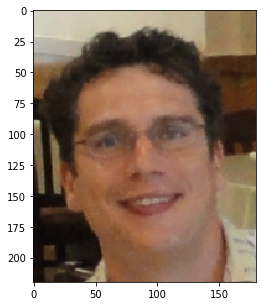

In [584]:
#import libraries
import io
from PIL import Image
import matplotlib.pyplot as plt
#allow to print images in this notebook
%matplotlib inline

#read the images as byte array, pass container and blob name
blob_bytes = blob_service.get_blob_to_bytes(NEW_CONTAINER_NAME, blob_name_list[3])

#store byte stream from object 
blob_bytes_in_memory = io.BytesIO(blob_bytes.content)

#read bytes and display image
img_bytes = Image.open(blob_bytes_in_memory)

#create figure object and plot the image
plt.figure(figsize=(5,5))
plt.imshow(img_bytes);

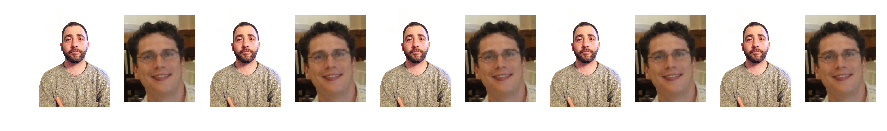

In [585]:
#list of BLOBs'name in the cloud storage
blobs = ['andrea_porelli.jpg', 'ista_zahn.png'] * 5

#plot multiple BLOBs
images_bytes = []
fig, ax = plt.subplots(1, len(blobs), figsize = (15,5))
for i, blob in enumerate(blobs):
    blob_bytes = blob_service.get_blob_to_bytes(NEW_CONTAINER_NAME, blob)
    blob_bytes_in_memory = io.BytesIO(blob_bytes.content)
    images_bytes.append(Image.open(blob_bytes_in_memory))
    ax[i].imshow(images_bytes[i])
    #turn of frame around picture
    ax[i].set_axis_off() 

In [262]:
#why do we need array to display images? what is inside the blob? 

#let us print a slice of blob content
blob_bytes.content[0:40]

#################################################
# Answer: byte stream. Link to resource         #
# \x89PNG\ stands for file extension            #
#################################################         

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\xb4\x00\x00\x00\xdc\x08\x06\x00\x00\x00\xd9j\x8b\x05\x00\x00\x00\x04gAM'

### Play audios
Similarly to images, you can reproduce audio contents in your notebook. As before, you just need to read audio BLOB into an array and then reproduce the audio:

- **`import IPython.display`** module to reproduce audio
- call method get_blob_to_bytes() to downloads a blob as an array of bytes 
- store bytes into local memory (use method **`blob.content`** to extract byte stream from bytes object)
- reproduce audio in the notebook

Note: remember to instantiate BlockBlobService to communicate with storage in case you start from here

In [586]:
#import library
from IPython.display import Audio

#select audio blob name
blob_name = blob_name_list[0]

#read the images as byte array, pass container and blob name
blob_audio = blob_service.get_blob_to_bytes(NEW_CONTAINER_NAME, blob_name)

#read bytes and reproduce the audio
wav_bytes = Audio(data=blob_audio.content)
display(wav_bytes)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


###  Read datasets
You can also store csv files in your cloud. Let's retrive and use it for some basic visualization. To do so you will follow to next steps:
- Call method **`make_blob_url()`** from your BlobService to retrieve the csv from the cloud storage
- **`import pandas`** library to read the data into a csv 

In [345]:
#select csv blob name
blob_name = blob_name_list[2]

#url to access data uploaded 
data_url = blob_service.make_blob_url(NEW_CONTAINER_NAME, blob_name)

In [350]:
#import library to manipulate dataframe
import pandas as pd

# read data 
data = pd.read_csv(data_url)

#set column month as index
df = data.set_index('Month')

#set new columns' name
df.columns = ['IBM', 'Amazon', 'Microsoft', 'Google']

#show first 10 rows
df.head(5)

,IBM,Amazon,Microsoft,Google
Month,,,,
2004-01,0.0,2,11,2.0
2004-02,0.0,3,11,0.5
2004-03,0.0,3,6,1.0
2004-04,0.0,3,9,1.0
2004-05,0.0,4,9,1.0


In [ ]:
#What is it the most queried cloud computing platform on google trend? It has always been like that?

#Plot trends for each platform

#################################################
# Answer: Look at the Graph                     #
# Add important dates                           #
#################################################      

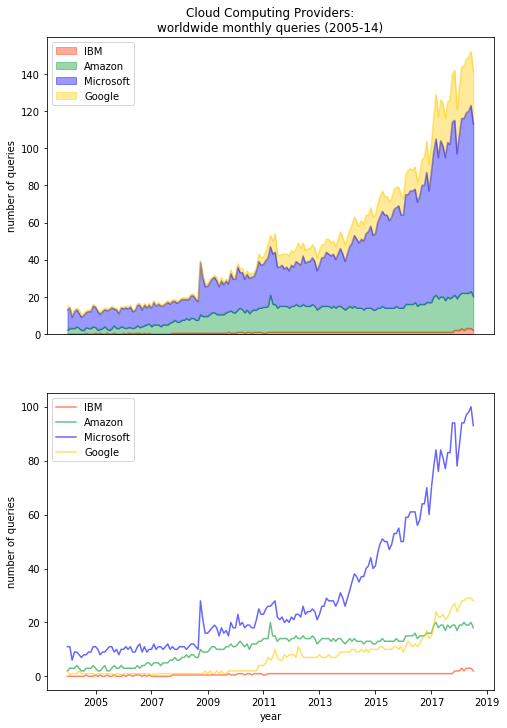

In [557]:
import matplotlib.dates as mdates
import datetime as dt

#transform months to datetime
x = [dt.datetime.strptime(d,'%Y-%m').date() for d in df.index]

#set custom colors
set_colors = ['#ff3300',  '#009933', '#0000ff', '#ffcc00']

#set number of subplots in the figure
fig, ax = plt.subplots(2, 1)

#plot trends stacked in the first subplot
df.plot(kind='area', alpha=0.4, ax=ax[0], title='Cloud Computing Providers:\nworldwide monthly queries (2005-14)',
        color = set_colors, xticks=None, stacked=True, figsize=(8,12))

#plot trends in the second subplot
for col, color in zip(df.columns, set_colors):
    ax[1].plot(x,df[col], label=col, alpha=0.6, color=color)

#set legend, and labels
plt.legend(loc='best')
plt.ylabel('number of queries')
plt.xlabel('year')
ax[0].set_ylabel('number of queries')
ax[0].axes.get_xaxis().set_visible(False)
ax[0].axes.get_xaxis().set_ticks([x])
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

### Delete BLOB container

Once finish poking around is a good practice to delete the container if you do not plan to use the files any soon. This reduce your storage costs but also expose you to lost of data. Make sure you have a copy of your data somewhere. By deliting the container you are going to delete all the contents.  

- Call from the BlockBlobService object the method delete_container()
- Pass the name of the container you would like to delete

Puff!

In [600]:
#delete container
delete_container = blob_service.delete_container(NEW_CONTAINER_NAME)
print("{} delition status success: {}".format(NEW_CONTAINER_NAME, delete_container))

myplayground delition status success: True


## Recap
### What you have learnt
- What is cloud storage and when it is useful (a,b,c)
- Deploy public cloud storage
- Open questions for discussion. Now that you know more about cloud, what do you think about a,b,c?
- Use the first section of the Experiment to practice what you have learnt

### What you will learn next guide
- How to use public cloud services:
    - Azure Cognitive Services, Speech Recognition and Text Analytics using APIs
    - Maybe >>> Machine Learning Studio UI

#TODO
-DECIDE IF SET UP EXPERIMENT GOES HERE
-ARE WE GOING TO USE STORAGE WITH ML STUDIO?
-HOW MUCH THE STORAGE WILL COST?

#TODO
-SET VIRTUAL ENVIRONMENT
-INSTALL REQUIREMENTS

#TODO
-REVIEW REFERENCES

In [ ]:
# Azure Storage Blob Sample - Demonstrate how to use the Blob Storage service. 
# Blob storage stores unstructured data such as text, binary data, documents or media files. 
# Blobs can be accessed from anywhere in the world via HTTP or HTTPS. 
#
 
# Documentation References: 
#  - What is a Storage Account - http://azure.microsoft.com/en-us/documentation/articles/storage-whatis-account/ 
#  - Getting Started with Blobs - https://azure.microsoft.com/en-us/documentation/articles/storage-python-how-to-use-blob-storage/
#  - Blob Service Concepts - http://msdn.microsoft.com/en-us/library/dd179376.aspx 
#  - Blob Service REST API - http://msdn.microsoft.com/en-us/library/dd135733.aspx 
#  - Blob Service Python API - http://azure.github.io/azure-storage-python/ref/azure.storage.blob.html
#  - Storage Emulator - http://azure.microsoft.com/en-us/documentation/articles/storage-use-emulator/

#### Other links

- Azure Storage princing:https://azure.microsoft.com/en-us/pricing/details/storage/
- Azure Storage documentation: https://docs.microsoft.com/en-us/azure/storage/ #here you can see language available
- Azure Storage quickstart: https://docs.microsoft.com/en-us/azure/storage/blobs/storage-quickstart-blobs-python
- Azure Storage SDK: https://github.com/Azure/azure-storage-python/tree/master/azure-storage-blob

#### other resources:
- https://docs.microsoft.com/en-us/azure/storage/blobs/storage-quickstart-blobs-python
-https://github.com/squillace/staging/blob/master/articles/storage/storage-python-how-to-use-blob-storage.md
    
#### Community: active community to try stuff (show how to navigate, select example for Python)

https://azure.microsoft.com/en-us/resources/samples/?sort=0
https://github.com/Azure/azure-storage-python/tree/master/azure-storage-blob
https://github.com/Azure/azure-sdk-for-python

In [504]:
#import library to display notebook as HTML
import os
from IPython.core.display import HTML

#path to .ccs style script
cur_path = os.path.dirname(os.path.abspath("__file__"))
new_path = os.path.relpath('..\\..\\styles\\custom_styles_public_cloud_computing.css', cur_path)

#function to display notebook
def css():
    style = open(new_path, "r").read()
    return HTML(style)

In [505]:
#run this cell to apply HTML style
css()